<a href="https://colab.research.google.com/github/abivilion/Ensemble-Diabetes-Predict/blob/master/The_Ensembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Ensembles**

This project aims to provide best predicted result of Power Compsumtion of a City.

**Dataset** - Diabetes Binary Data

**Source** - Self

***Algorithm -*** 

*   Logistic Regression
*   k-Nearest Neighbors
*   Random Forest

***Voting System -***


*   Voting Classifier
<br>

**TYPE -** Ensemble Model


 
<br>

# **STEP 1 - Reading in the Training data**

In [1]:
import pandas as pd
#read in the dataset
df = pd.read_csv('/content/diabetes_data.csv')
#take a look at the data
df.head()


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


***Shape of Data***


In [2]:
#check dataset size
df.shape

(768, 9)

# **STEP 2 - Data Preprocessing**

***Split up the dataset into inputs and targets***

In [3]:
#split data into inputs and targets
X = df.drop(columns = ['diabetes'])
y = df['diabetes']

***Split the dataset into train and test data***

**Stratify** - Setting ‘stratify’ to y makes our training split represent the proportion of each value in the y variable. ***For example***, in our dataset, if 25% of patients have diabetes and 75% don’t have diabetes, **setting ‘stratify’** to **y will ensure** that the **random split** has 25% of patients with diabetes and 75% of patients without diabetes.

In [4]:
from sklearn.model_selection import train_test_split
#split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y) 
y_train

244    0
740    1
574    0
490    0
729    0
      ..
293    1
53     1
444    1
187    1
146    0
Name: diabetes, Length: 537, dtype: int64

***Label Encoding***

In [5]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
# print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1
 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0
 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1
 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0
 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0
 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 0 0 

# **STEP 3- Applying Multiple Algorithms** 

## **Linear Regression**


In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,training_scores_encoded)
y_pred = model.predict(x_train)
y_pred

array([ 4.77868691e-01,  5.99807287e-01,  3.23332019e-01,  1.25761420e-01,
        1.01841553e-01,  5.44218039e-01, -6.43657067e-02,  9.95020853e-03,
        2.46727626e-01,  1.62189128e-01,  6.25485466e-01,  3.50009663e-01,
        2.11953082e-01,  6.57441116e-01,  3.82743611e-01,  8.13714077e-02,
        2.55562957e-01,  3.41184212e-01, -2.51999889e-01,  8.68880686e-02,
        5.85055863e-01,  3.14654891e-01,  2.83923337e-01,  1.57616384e-01,
        8.34230687e-01,  7.75934904e-01,  3.94231319e-01, -5.26875985e-03,
        3.62474558e-01,  7.66596916e-01,  2.90415611e-02,  2.72750312e-01,
        3.09239545e-01,  5.54517570e-01,  6.28907677e-01,  1.13731964e-01,
        3.95580334e-01,  3.67319059e-01,  3.23586415e-01,  2.47580304e-01,
       -4.55795799e-02,  2.27522930e-01,  2.33974298e-01,  4.12536943e-02,
        2.14142775e-01,  1.38168788e-01,  4.68705191e-01,  2.78581591e-01,
        3.02979460e-01,  1.81900805e-01, -1.54511463e-02,  9.78856993e-01,
        6.03813992e-01,  

## **Logistic Regression (In Use)** 


In [7]:
from sklearn.linear_model import LogisticRegression
# Simple example for beginers how to adress ""
import numpy as np

#create a new logistic regression model
log_reg = LogisticRegression()
#fit the model to the training data

log_reg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

## **k-Nearest Neighbors (In Use)**

In [8]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# from sklearn import preprocessing

#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)
#fit model to training data
knn_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [9]:
#save best model
knn_best = knn_gs.best_estimator_
#check best n_neigbors value
print(knn_gs.best_params_)


{'n_neighbors': 22}


## **Random Forest Classifier(In- Use)**

In [10]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

#create a new random forest classifier
rf = RandomForestClassifier()

#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}

#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)

#fit model to training data
rf_gs.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200]})

In [11]:

#save best model
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 200}


# **STEP 4 -Score Check and Comparision**

In [12]:
#test the three models with the test data and print their accuracy scores
print('knn: {}'.format(knn_best.score(x_test, y_test)))
print('rf: {}'.format(rf_best.score(x_test, y_test)))
print('log_reg: {}'.format(log_reg.score(x_test, y_test)))

knn: 0.70995670995671
rf: 0.7532467532467533
log_reg: 0.7619047619047619


# **STEP 5 - Creating Ensemble Model**

**Ensemble System -** Voting Classifier 



In [13]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', log_reg)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [14]:
#fit model to training data
ensemble.fit(x_train, y_train)
#test our model on the test data
ensemble.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7619047619047619

# **STEP 6 - Data Visualizations and Graph**

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
import numpy as np
import pandas as pd
# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
# plotly import for Colab
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
  
# plotly importthjgj
import plotly.express as px
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import IPython
IPython.get_ipython().events.register('pre_run_cell', configure_plotly_browser_state)

In [17]:
# Loading Dataset
df = pd.read_csv('/content/diabetes_data.csv')
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df[['glucose','diastolic','triceps','insulin','bmi']] = df[['glucose','diastolic','triceps','insulin','bmi']].replace(0,np.NaN)
df.isnull().sum()

pregnancies      0
glucose          5
diastolic       35
triceps        227
insulin        374
bmi             11
dpf              0
age              0
diabetes         0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      763 non-null    float64
 2   diastolic    733 non-null    float64
 3   triceps      541 non-null    float64
 4   insulin      394 non-null    float64
 5   bmi          757 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


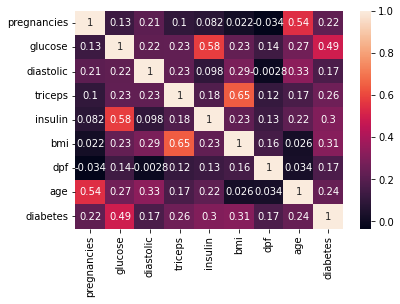

In [21]:
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'Diabetes Patient')

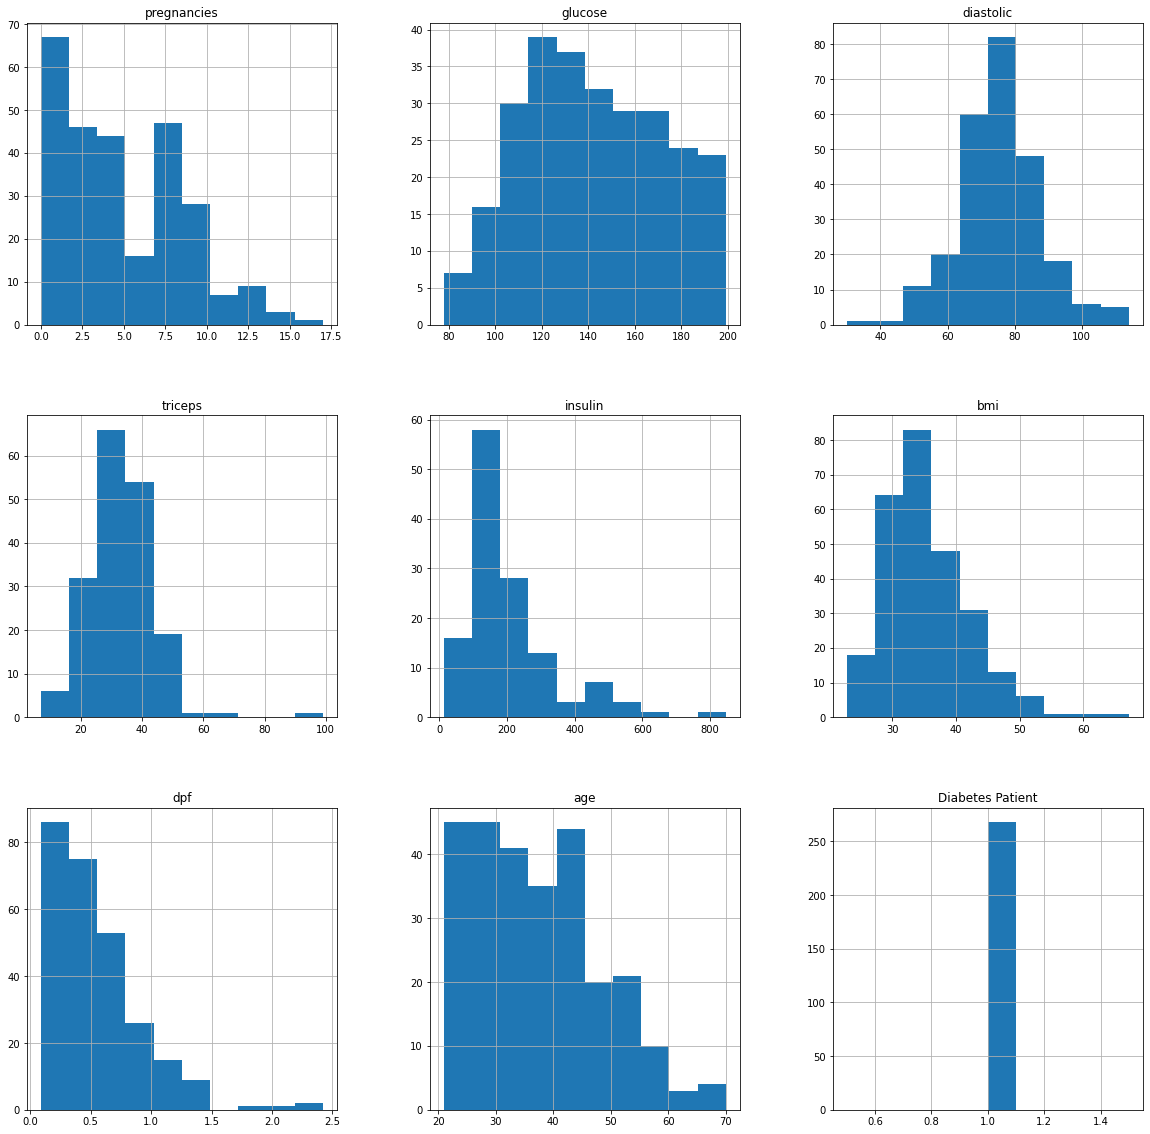

In [26]:
p = df[df['diabetes']==1].hist(figsize = (20,20))
plt.title('Diabetes Patient')